In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

In [54]:
df=pd.read_csv('heart.csv')

In [55]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [56]:
from sklearn.model_selection import train_test_split
X,Y=df.drop('target', axis=1), df['target']

In [57]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.4, random_state=9)

In [58]:
forest.fit(X_train,Y_train)

RandomForestClassifier()

In [59]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(X_train,Y_train)


GaussianNB()

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)


GradientBoostingClassifier()

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_scaled,Y_train)

KNeighborsClassifier()

In [63]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train_scaled,Y_train)

LogisticRegression()

In [64]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_scaled,Y_train)

SVC()

In [65]:
forest.score(X_test,Y_test)

0.9853658536585366

In [66]:
nb_clf.score(X_test,Y_test)

0.8463414634146341

In [67]:
gb.score(X_test,Y_test)

0.9707317073170731

In [68]:
knn.score(X_test_scaled,Y_test)

0.8536585365853658

In [69]:
log.score(X_test_scaled,Y_test)

0.8731707317073171

In [70]:
svc.score(X_test_scaled,Y_test)

0.9341463414634147

In [71]:
#finding recalls


In [72]:
from sklearn.metrics import recall_score
y_pred=forest.predict(X_test)
print('Forest:', recall_score(Y_test, y_pred))

Forest: 0.9859154929577465


In [73]:
y_pred=nb_clf.predict(X_test)
print('Guassian Naive Bayes:', recall_score(Y_test, y_pred))

y_pred=gb.predict(X_test)
print('Gradient Boost:', recall_score(Y_test, y_pred))

y_pred=knn.predict(X_test_scaled)
print('KNN:', recall_score(Y_test, y_pred))

y_pred=log.predict(X_test_scaled)
print('Logistic Regression:', recall_score(Y_test, y_pred))

y_pred=svc.predict(X_test_scaled)
print('SVM:', recall_score(Y_test, y_pred))

Guassian Naive Bayes: 0.9014084507042254
Gradient Boost: 0.9859154929577465
KNN: 0.8732394366197183
Logistic Regression: 0.92018779342723
SVM: 0.9530516431924883


In [74]:
# we find random forest has best accuracy and recall


Hyperparamter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators': [100,200,500],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['sqrt, log2', None]
    
}

forest=RandomForestClassifier(n_jobs=-1, random_state=9 )
grid_search=GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=2)

In [76]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_par

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt, log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [77]:
best_forest=grid_search.best_estimator_

In [78]:
best_forest

RandomForestClassifier(max_features=None, n_estimators=200, n_jobs=-1,
                       random_state=9)

Feature Importance

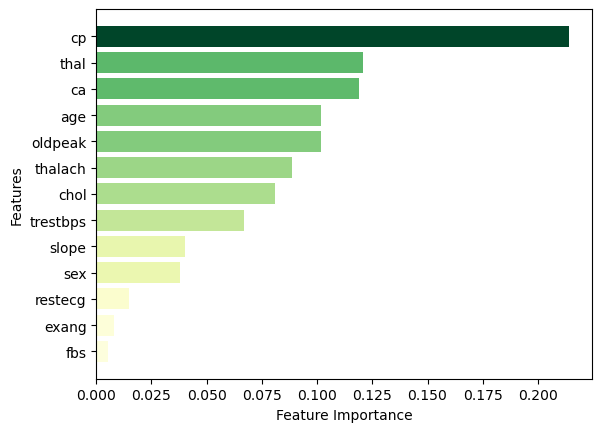

In [79]:
feature_importance=best_forest.feature_importances_
features=best_forest.feature_names_in_


sorted_idx=np.argsort(feature_importance)
sorted_features=features[sorted_idx]
sorted_importances=feature_importance[sorted_idx]

colors=plt.cm.YlGn(sorted_importances/ max(sorted_importances))

plt.barh(sorted_features,sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()
